In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Retail Sales Time Series Forecasting/feature_engineering/feature_engineering.csv')

# Heatmap of Correlation in numerical vaules

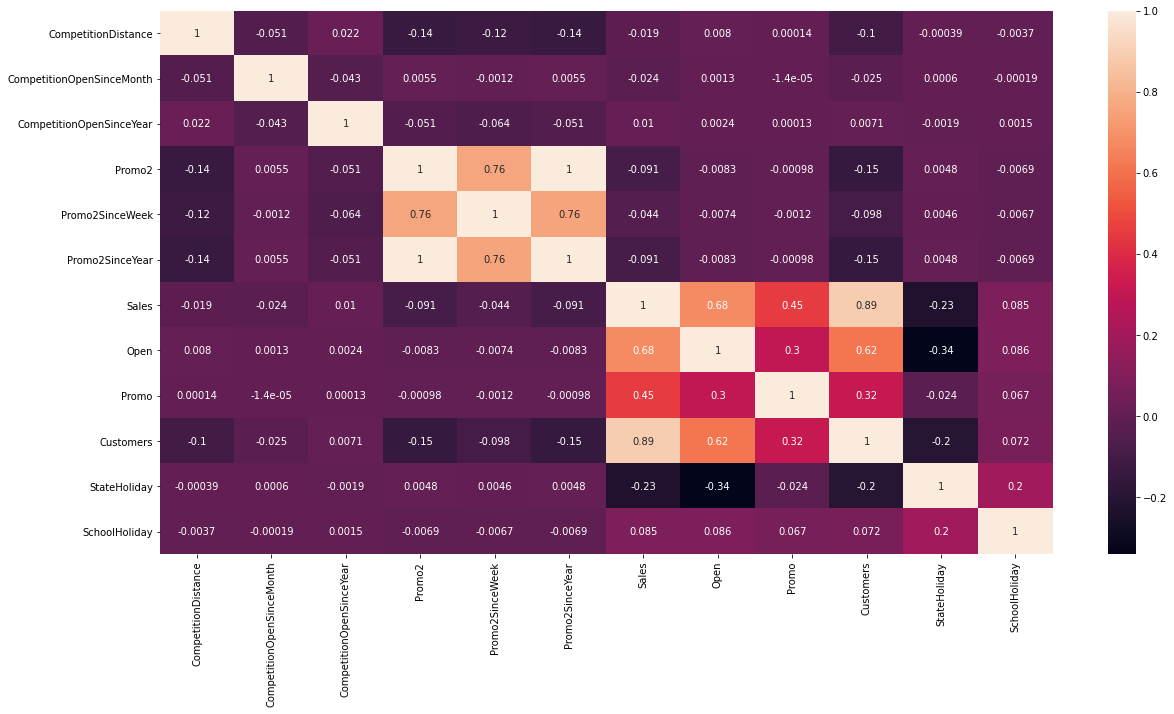

In [5]:
numerical=df[["CompetitionDistance",'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek',"Promo2SinceYear","Sales",'Open',"Promo","Customers","StateHoliday",'SchoolHoliday']]
plt.figure(figsize=(20, 10))
sns.heatmap(numerical.corr(), annot=True)
plt.show()

# Plot of Promotion Data

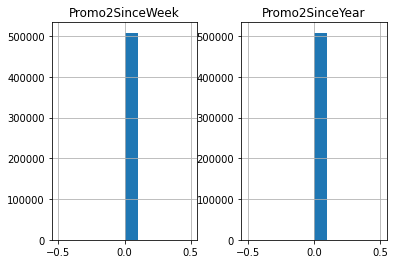

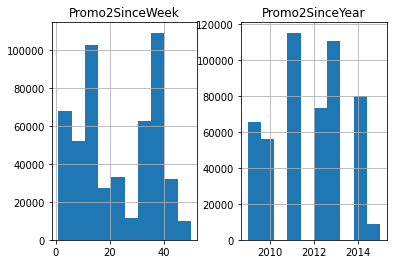

In [6]:
#checking the data when the store has  no promotion
df_Open=df[(df.Promo2==0)]
df_Open.head()
df_Open.hist(['Promo2SinceWeek','Promo2SinceYear'])
plt.show()


#checking the data when the stores has promotion
df_close=df[(df.Promo2==1)]
df_close.head()
df_close.hist(['Promo2SinceWeek','Promo2SinceYear'])
plt.show()

In [7]:
df_open = df[~((df.Open ==0) | (df.Sales==0))]
df_open
print(df_open.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Open_0', 'Open_1', 'Promo2_0', 'Promo2_1',
       'SchoolHoliday_0', 'SchoolHoliday_1', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'PromoInterval_0',
       'PromoInterval_Feb_May_Aug_Nov', 'PromoInterval_Jan_Apr_Jul_Oct',
       'PromoInterval_Mar_Jun_Sept_Dec', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'date_year', 'date_weekofyear',
       'date_month', 'date_dayofweek', 'date_day'],
      dtype='object')


In [ ]:
sns.factorplot(data = df_open, x='date_month', y='Sales',
              col ='Promo', hue='Promo2', row='date_year')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


# Insights of some columns

## 1. Open column 


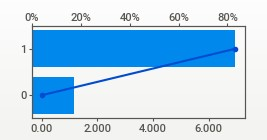

Open column contains 2 categories 1) When the store is open(==1) 2)When the store is close(==0)
So there are about 83% of open data which says store is open and 17% which says store is close.

## 2. Day of week

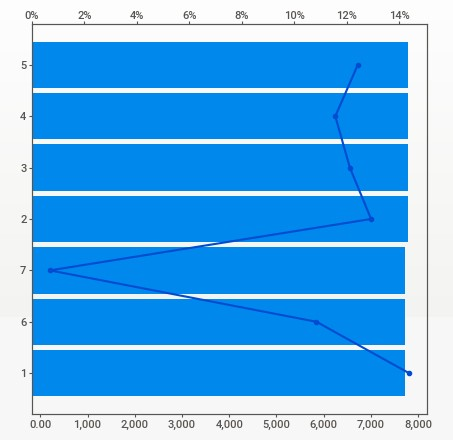

Since there are 7 days of week the data is equally divided in all 7 days(approx 14%) but the sale on the particular day might vary.
It also can be seen that on day 7 i.e. sunday the sale is minimum.

## 3. School Holiday

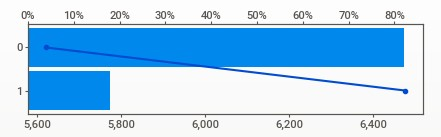

When the public school are close(==0) the the sale is less then compared to when the schools are open(==1).

## 4. Store type

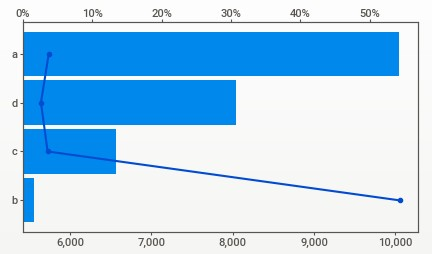

We can see that store type a is max in the dataset but its sale is less as compared to store type b which has less data but sale is pretty much high.

## 4. Promo column

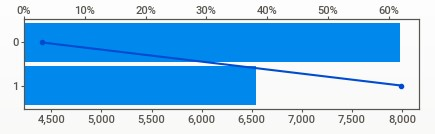

Promo2 column contains the detail of whether the store has some promotion (==1) or not(==0)
If promotion is not there then there will not be any sequence of promotion since week or year